## Metodologia di testing

Le strutture dati analizzate sono:

- _Adapative_ HH-tree
- _Strict_ HH-tree
- Tabella di hash
- Lista

I dataset considerati sono

- MAGIC Gamma Telescope Dataset (`magic04`)
- Cloud DataSet (`cloud`)
- Shelter Animal Outcomes (`shelterDogs`)

I parametri `m` e `b` hanno valori da 1 a 50, per ogni loro combinazione sono state prelevate 10 permutazioni dei primi 50 elementi di ognuno dei 3 dataset e sono state inserite, una per volta, in tutte le strutture dati. Da ogni struttura dati è stata prelevata la metrica `avg_insertion` che misura il numero medio di accessi necessari per completare un inserimento `avg_size` che misura il numero medio di slot utilizzati dalla struttura dati per conservare i dati e `avg_access` che misura il numero medio di accessi necessari per effettuare una ricerca. Per le strutture ad albero sono state inoltre prelevate:

- `avg_depth`: profondità media dell'albero
- `avg_usage`: percentuale di riempimento delle foglie rispetto al massimo
- `std_depth`: deviazione standard della profondità dell'albero
- `std_usage`: deviazione standard del riempimento delle foglie rispetto al massimo

Ci interessano il tempo e lo spazio utilizzati da ogni struttura dati. Per il tempo possiamo considerare il numero di accessi necessari per completare un inserimento e quello per effettuare una ricerca (con ogni numero di feature). Per lo spazio dobbiamo fare considerazioni ad hoc per ogni struttura dati:

- HH-tree: il numero di nodi e foglie rispetto al numero di elementi
- Tabella di hash: la taglia della Tabella
- Lista: la taglia della lista


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

min_m = min_b = 1
max_m = max_b = 50

def scatter(ax, x, y, z, label):
    ax.scatter(x, y, z, c=z)
    ax.set_xlabel("m")
    ax.set_xbound(min_m, max_m)
    ax.set_ylabel("b")
    ax.set_ybound(min_b, max_b)
    ax.set_zlabel(label)

def graphs(*args, **kwargs):
    fig = plt.figure(figsize=(20, 20))

    for index, (z, label) in enumerate(args):
        ax = fig.add_subplot(1, len(args), index + 1, projection='3d')
        
        plt.xticks(range(min_m, max_m + 5, 3))
        plt.yticks(range(min_b, max_b + 5, 3))

        if kwargs.get("keep_outliers", False):
            scatter(ax, x, y, z, label)
        else:
            upper = np.percentile(z, q=95)
            lower = np.percentile(z, q=5)
    
            mask = [lower <= v <= upper for v in z]
            scatter(ax, x[mask], y[mask], z[mask], label)

    if "title" in kwargs:
        plt.title(kwargs["title"])

    plt.show()

In [4]:
tree = pd.read_csv("../data/tree/magic04.out")
hashgroup = pd.read_csv("../data/hashgroup/magic04.out")
linear = pd.read_csv("../data/linear/magic04.out")

x, y = tree["m"], tree["b"]

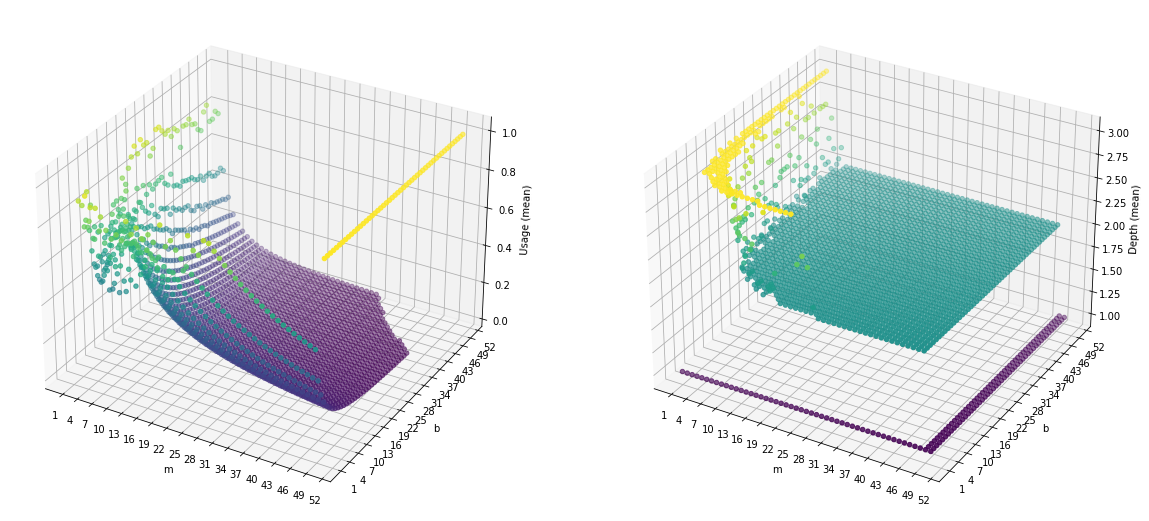

In [5]:
graphs((tree["avg_usage"], "Usage (mean)"), (tree["avg_depth"], "Depth (mean)"))

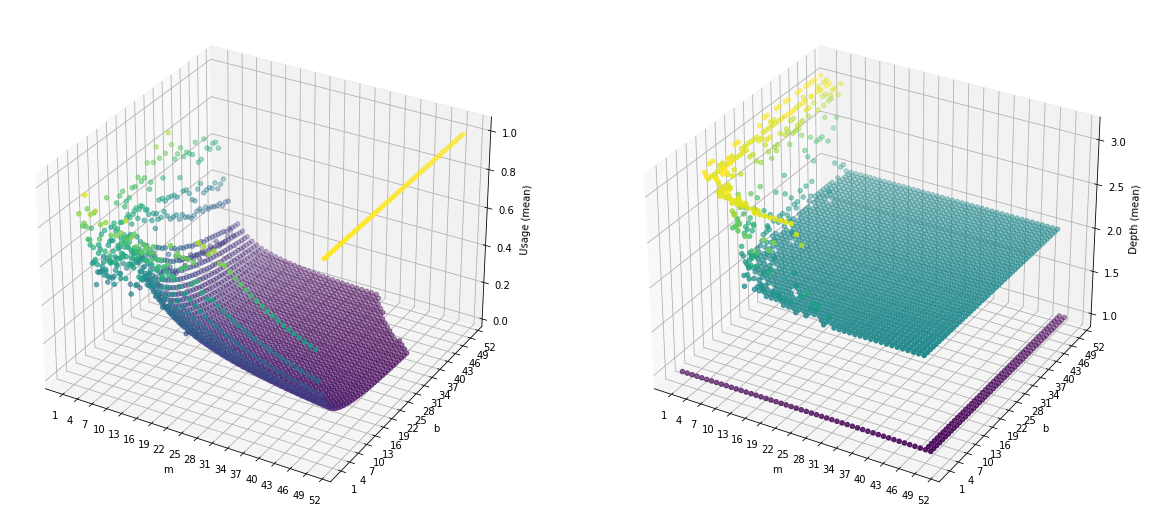

In [7]:
tree = pd.read_csv("../data/tree/cloud.out")
graphs((tree["avg_usage"], "Usage (mean)"), (tree["avg_depth"], "Depth (mean)"))

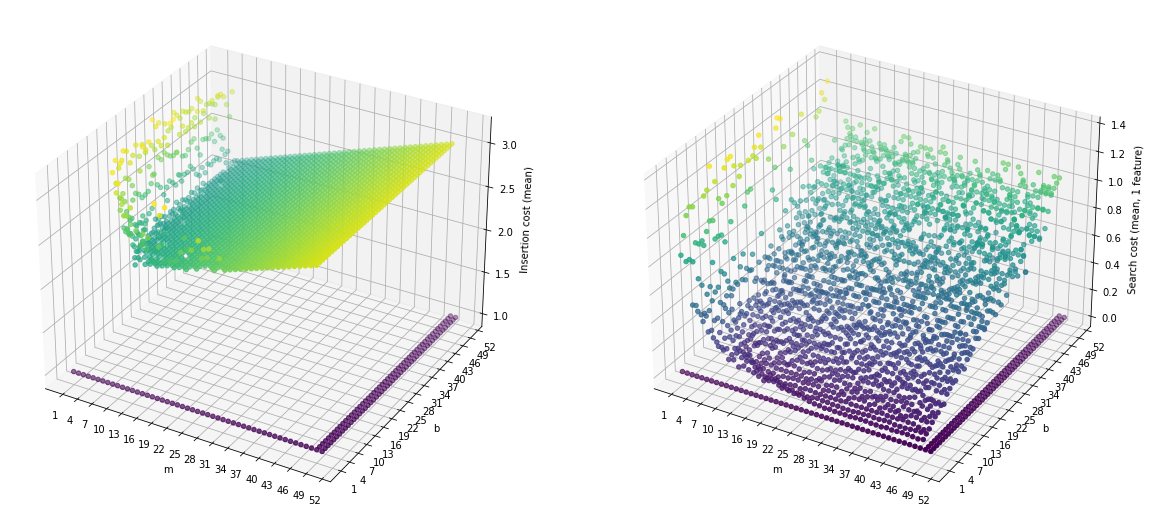

In [9]:
graphs((tree["avg_insertion"], "Insertion cost (mean)"), (tree["avg_access"], "Search cost (mean, 1 feature)"))

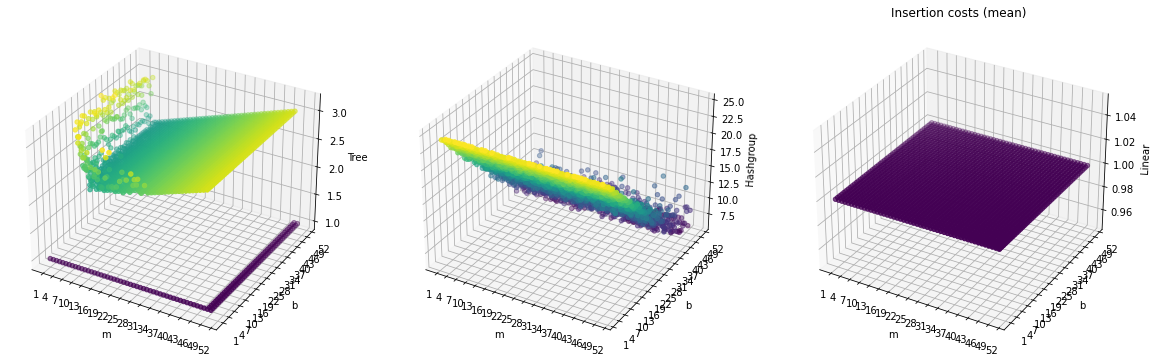

In [10]:
graphs((tree["avg_insertion"], "Tree"), (hashgroup["avg_insertion"], "Hashgroup"), (linear["avg_insertion"], "Linear"), title="Insertion costs (mean)")